In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#### Read KNN Tutorial:
https://medium.com/analytics-vidhya/a-beginners-guide-to-knn-and-mnist-handwritten-digits-recognition-using-knn-from-scratch-df6fb982748a


In [9]:
data = load_digits()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
X.shape

(1797, 64)

In [11]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

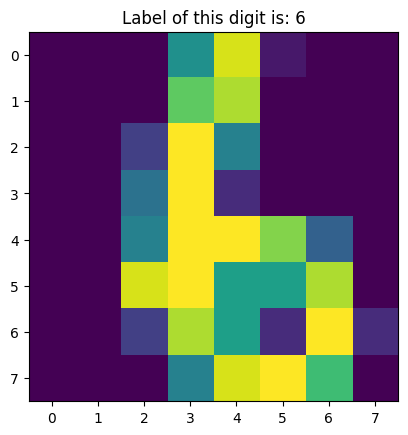

In [12]:
def show_digit(x_vec, label):
    x_mat = x_vec.reshape(8, 8)
    plt.imshow(x_mat)
    plt.title('Label of this digit is: ' + str(label))
    plt.show()

i = 16
show_digit(X[i], y[i])

# plot the # of sample for each category in Training and Testing

In [13]:
y_train_df = pd.DataFrame(data = y_train, columns = ['class'])
y_test_df = pd.DataFrame(data = y_test, columns = ['class'])

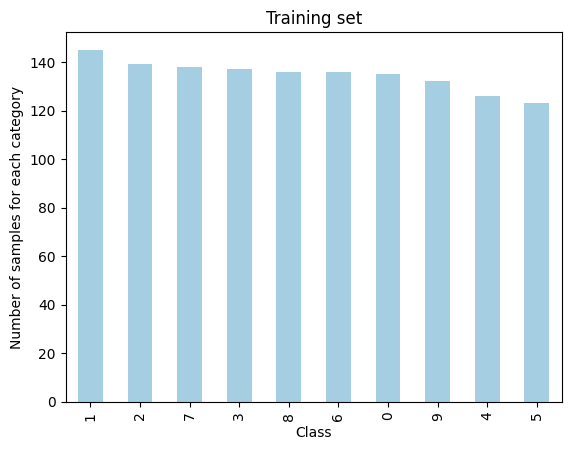

In [14]:
y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()

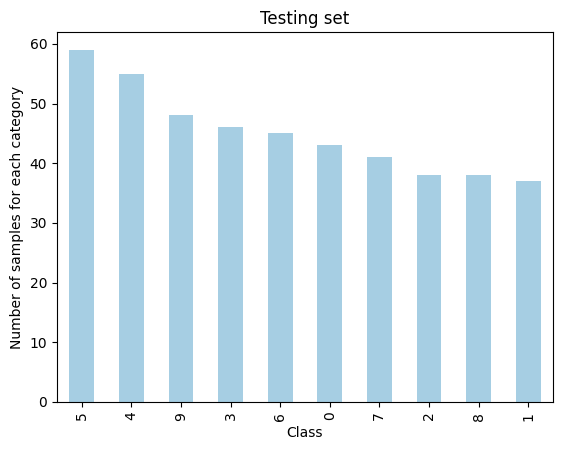

In [15]:
y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.show()

# code for performing knn classification

In [1]:
from scipy.stats import mode

# calculates euclidean distance
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

def knn(k, X_train, X_test, y_train):

    pred_test = []

    for i in range(len(X_test)): 
        
        distance_lst = []
        
        for j in range(len(X_train)):
            d = dist(X_test[i], X_train[j])
            distance_lst.append([j, d])
            
        distance_lst.sort(key=lambda x:x[1])
        k_neighbors = distance_lst[:k]
        k_neighbors = np.array(k_neighbors)
        neigbor_idx = k_neighbors[:, 0].astype(int)
        neigbor_labels = y_train[neigbor_idx]
        mode_val, count = mode(neigbor_labels, keepdims=True)
        pred_test.append(mode_val)

    pred_test = np.array(pred_test).ravel()


    return pred_test


In [2]:
lst  =[[12,4,4], [1,4,3], [1,3,5], [4,5,7]]
lst.sort(key=lambda inner_lst: inner_lst[1])

In [5]:
np.array(lst)[:,0]

array([ 1, 12,  1,  4])

In [6]:
sorted_lst =sorted(lst)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
pred_test = knn(3, X_train, X_test, y_train)

print("Accuracy:", accuracy_score(y_test, pred_test))

Accuracy: 0.98989898989899


In [20]:
y_test

0


array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

### Challenge: How to speed up knn func?
Hint 1: Try to get rid of the loops using list comprehension, pandas dataframes, etc.

Hint 2: Look at the documentation of mode function in scipy.stats

Hint 3: sklearn.metrics.pairwise_distances



In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

pred_test = model.predict(X_test)
acc = accuracy_score(y_test, pred_test)
print("Accuracy:", acc)

Accuracy: 0.98989898989899


In [36]:
len(y_test) - (len(y_test) * acc)

6.0

In [39]:
mask = pred_test != y_test
pred_test[mask]

array([9, 8, 4, 1, 5, 3])

In [40]:
y_test[mask]

array([7, 9, 9, 8, 9, 9])

### How to find the best k?

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

val_size = 400
X_val = X_train[:val_size]
y_val = y_train[:val_size]
X_train = X_train[val_size:]
y_train = y_train[val_size:]

results = {}
for k in np.arange(1, 23, 2):
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)

    pred_val = model.predict(X_val)
    results[k] = accuracy_score(y_val, pred_val)

In [95]:
len(X_train), len(X_test)

(947, 450)

In [105]:
results

{1: 0.9775,
 3: 0.9825,
 5: 0.9775,
 7: 0.965,
 9: 0.9625,
 11: 0.96,
 13: 0.955,
 15: 0.9525,
 17: 0.9425,
 19: 0.9375,
 21: 0.9375}

# plot the curve of validation accuracy w.r.t. different K values

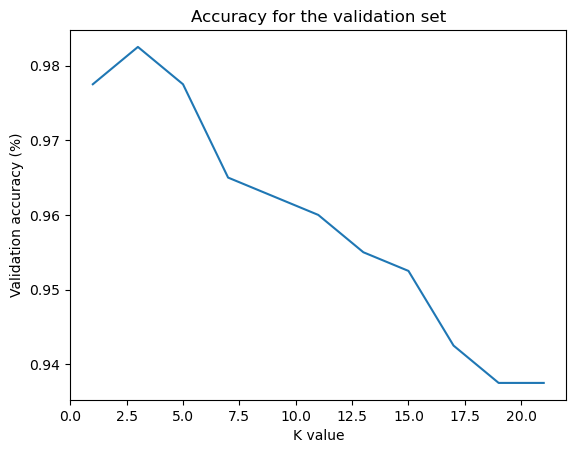

In [106]:
plt.plot(results.keys(), results.values())
plt.xlabel('K value')
plt.ylabel('Validation accuracy (%)')
plt.title('Accuracy for the validation set')
plt.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

pred_test = model.predict(X_test)
accuracy_score(y_test, pred_test)

0.98989898989899

### But actually the best k is 5 ?!

In [100]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model.fit(X_train, y_train)

pred_test = model.predict(X_test)
accuracy_score(y_test, pred_test)

0.9932659932659933

In [101]:
# Homework
# So, we should implement cross-validation
